In [31]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format
df = pd.read_csv('Data/weatherAUS.csv')
df.Date=pd.to_datetime(df.Date).dt.date
df.insert(0, 'Year', pd.DatetimeIndex(df['Date']).year)
df.insert(0, 'Month', pd.DatetimeIndex(df['Date']).month)

In [32]:
df.isna().sum()

Month                0
Year                 0
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

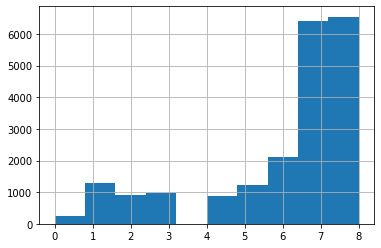

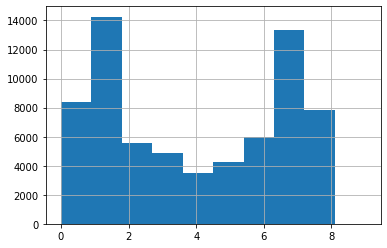

In [33]:
df.where(df.RainTomorrow == 'Yes').Cloud9am.hist()
plt.figure()
df.where(df.RainTomorrow == 'No').Cloud9am.hist()

In [29]:
def fill_by_month(atr):
#     mean=df.groupby(by=["Location", "Year", "Month"])[atr].mean()
#     tmp = df.groupby(by=["Location", "Year", "Month"])[atr].fillna(2)
#     df[atr].map(tmp)
    df[atr] = df.groupby(by=[df.Location, df.Year, df.Month]).transform(lambda x: x.fillna(x.mean()))

In [ ]:
fill_by_month("MaxTemp")

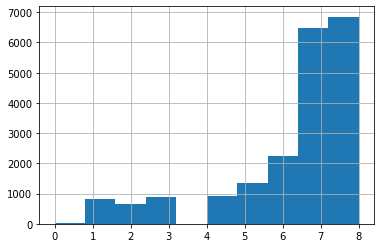

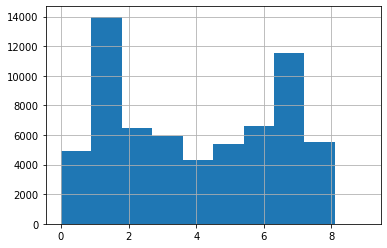

In [6]:
df.where(df.RainTomorrow == 'Yes').Cloud3pm.hist()
plt.figure()
df.where(df.RainTomorrow == 'No').Cloud3pm.hist()

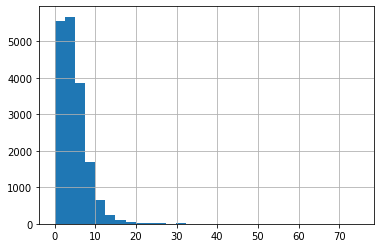

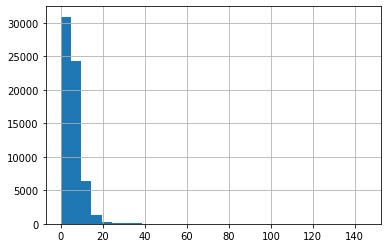

In [7]:
df.where(df.RainTomorrow == 'Yes').Evaporation.hist(bins=30)
plt.figure()
df.where(df.RainTomorrow == 'No').Evaporation.hist(bins=30)

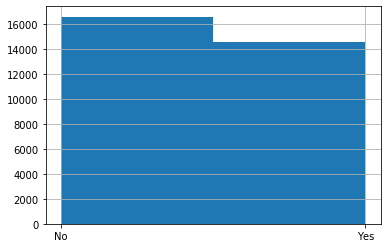

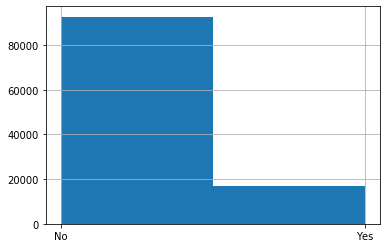

In [8]:
df.where(df.RainTomorrow == 'Yes').RainToday.hist(bins=2)
plt.figure()
df.where(df.RainTomorrow == 'No').RainToday.hist(bins=2)

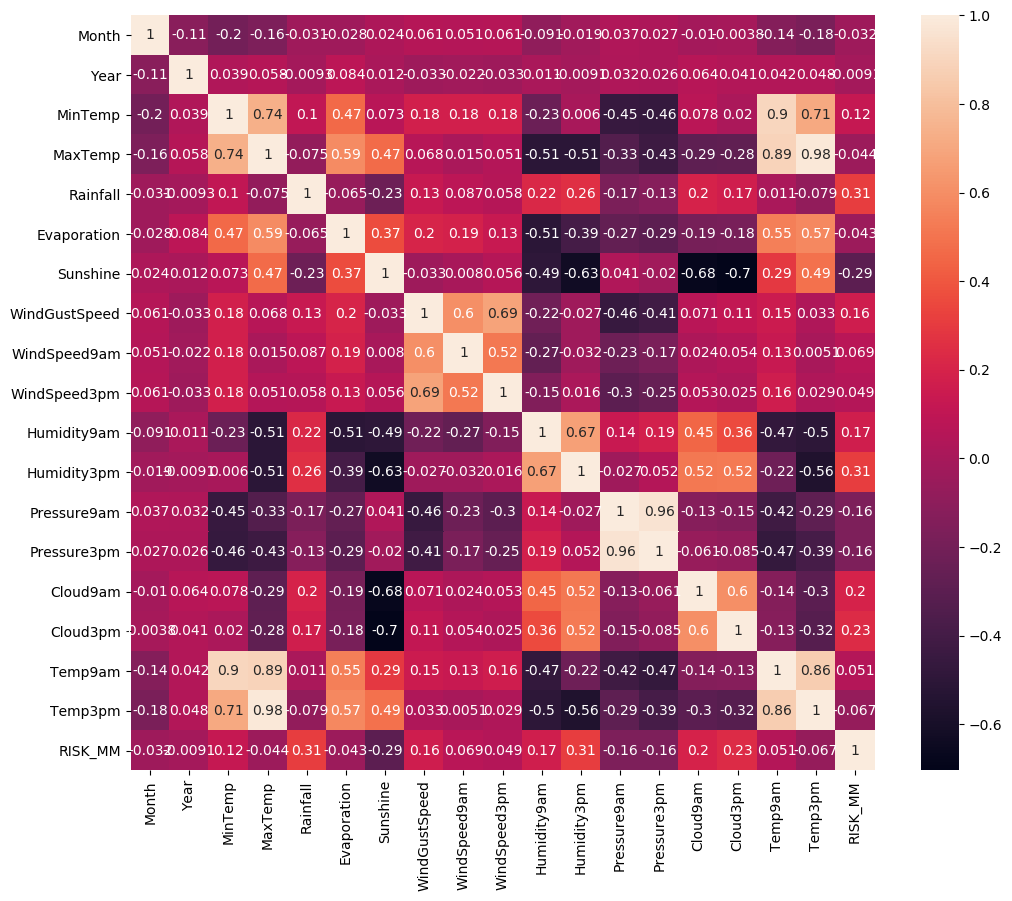

In [9]:
plt.figure(figsize=(12,10),dpi = 100)
sns.heatmap(df.corr(),annot = df.corr())

In [10]:
pd.options.display.float_format = "{:.2f}".format
df = pd.read_csv('Data/weatherAUS.csv')
df.Date=pd.to_datetime(df.Date).dt.date
df.insert(0, 'Year', pd.DatetimeIndex(df['Date']).year)
df.insert(0, 'Month', pd.DatetimeIndex(df['Date']).month)
df=df.drop(columns=["Temp9am", "Temp3pm", "Pressure9am", "RISK_MM", "Humidity9am", "Cloud9am", "MinTemp", "Rainfall", "Date"])

In [11]:
df.where(df.RainTomorrow == 'Yes').Humidity9am.hist()
plt.figure()
df.where(df.RainTomorrow == 'No').Humidity9am.hist()

AttributeError: 'DataFrame' object has no attribute 'Humidity9am'

/home/szymon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/szymon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.9210e+03, 1.3995e+04, 6.4960e+03, 5.9500e+03, 4.3180e+03,
        5.3900e+03, 6.6210e+03, 1.1564e+04, 5.5550e+03, 1.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

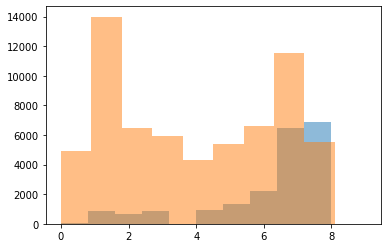

In [12]:
plt.hist(df.where(df.RainTomorrow == "Yes").Cloud3pm, alpha=0.5, label="Yes")
plt.hist(df.where(df.RainTomorrow == "No").Cloud3pm, alpha=0.5, label="No")